In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
happydf = pd.read_csv('2017.csv')
happydf

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [3]:
happydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [5]:
wh1 = happydf.iloc[:,[2,5,6,7,8,9,10]]
wh1

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148


In [6]:
corr = wh1.corr()
corr

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
Happiness.Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080
Economy..GDP.per.Capita.,0.812469,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944
Family,0.752737,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841
Health..Life.Expectancy.,0.781951,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752
Freedom,0.570137,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159
Trust..Government.Corruption.,0.429080,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000


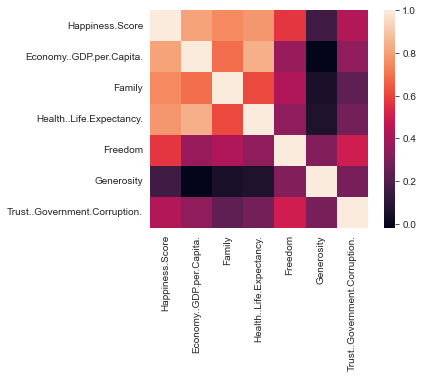

In [9]:
sns.heatmap(corr, square=True)
plt.show()

In [10]:
ss = StandardScaler()
X = happydf.iloc[:,[5,10]].values
XX = ss.fit_transform(X)
XX

array([[ 1.50618765,  1.90308437],
       [ 1.18651768,  2.73999784],
       [ 1.1823454 ,  0.30006609],
       [ 1.38344191,  2.40680857],
       [ 1.09398544,  2.56079976],
       [ 1.23792427,  1.57444226],
       [ 1.17893937,  1.62092002],
       [ 1.00370674,  2.56282438],
       [ 1.21513788,  2.57843667],
       [ 1.19136213,  1.75722637],
       [ 0.93141005, -0.37380164],
       [ 0.29799288, -0.22711087],
       [ 1.19775726,  0.96652596],
       [ 1.3388096 ,  0.12353995],
       [ 1.31365029,  1.72963811],
       [ 1.19972687,  1.51592295],
       [ 1.14216675,  1.26537256],
       [ 1.80535433,  1.93141289],
       [ 1.08936495,  1.40437027],
       [ 0.63911598, -0.40295446],
       [ 1.5297437 ,  1.98722085],
       [ 0.29238275, -0.11869343],
       [ 0.87728922, -0.85113462],
       [ 0.47821036, -0.62547117],
       [ 0.40165073,  0.09526981],
       [ 1.6869423 ,  3.36702216],
       [ 0.85487202,  0.29552172],
       [ 0.55513378,  0.54219374],
       [-0.26873475,

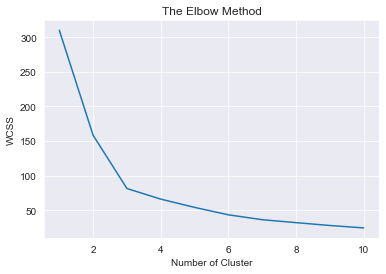

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(XX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(XX)
y_kmeans

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2], dtype=int32)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


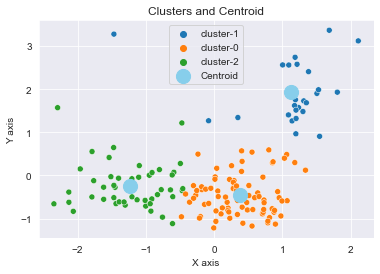

In [24]:
sns.scatterplot(XX[:,0], XX[:,1], hue=["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='skyblue', label='Centroid')
plt.title('Clusters and Centroid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend(loc=9)
plt.show();

------------------------------------------------------

In [25]:
malldf = pd.read_csv('Mall_Customers.csv')
malldf

,CustomerID,Genre,Age,AnnualIncomeKUSD,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
X = malldf.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

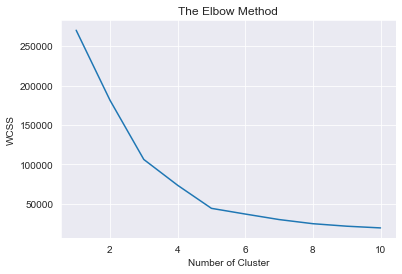

In [28]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


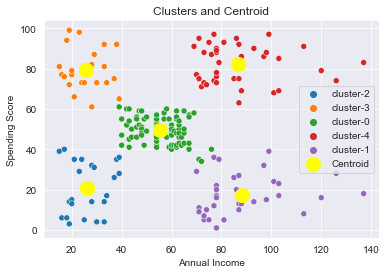

In [33]:
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='Centroid')
plt.title('Clusters and Centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc=7)
plt.show();

---

In [35]:
fashiondf = pd.read_csv('countries_with_top_sellers_fashion_c2c.csv')
fashiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [37]:
X = fashiondf.iloc[:,[8,18]].values
X

array([[ 1.        , 57.        ],
       [ 0.        , 14.        ],
       [ 2.        , 20.75      ],
       [ 4.        , 18.88888889],
       [ 1.        , 14.        ],
       [ 1.        , 38.        ],
       [ 1.        ,  5.23076923],
       [ 1.        ,  6.14285714],
       [10.        ,  8.31932773],
       [23.        ,  8.12680115],
       [ 1.        , 10.7       ],
       [ 1.        ,  5.        ],
       [ 2.        , 10.5       ],
       [18.        ,  6.24913495],
       [ 1.        ,  3.72222222],
       [ 4.        ,  5.10476191],
       [ 5.        ,  6.44666667],
       [ 1.        ,  3.96296296],
       [20.        ,  4.22720898]])

In [38]:
ss = StandardScaler()
XX = ss.fit_transform(X)
XX

array([[-0.58621767,  3.35039265],
       [-0.72901428,  0.0786046 ],
       [-0.44342106,  0.59219924],
       [-0.15782783,  0.45059084],
       [-0.58621767,  0.0786046 ],
       [-0.58621767,  1.90471886],
       [-0.58621767, -0.58862946],
       [-0.58621767, -0.51923042],
       [ 0.69895183, -0.35362693],
       [ 2.55530778, -0.36827591],
       [-0.58621767, -0.17248611],
       [-0.58621767, -0.60618825],
       [-0.44342106, -0.18770373],
       [ 1.84132472, -0.51114395],
       [-0.58621767, -0.70341192],
       [-0.15782783, -0.59821711],
       [-0.01503122, -0.49611414],
       [-0.58621767, -0.68509442],
       [ 2.12691794, -0.66498844]])

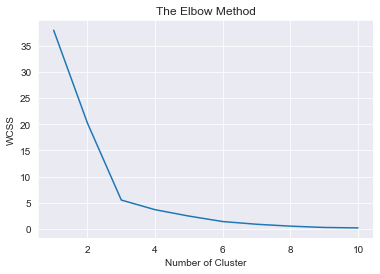

In [39]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(XX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(XX)
y_kmeans

array([1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0],
      dtype=int32)

In [48]:
import warnings
warnings.filterwarnings('ignore')

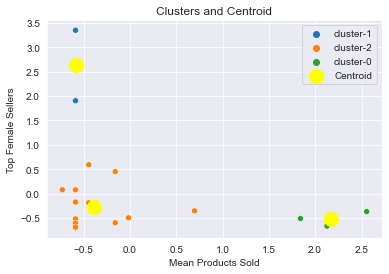

In [49]:
sns.scatterplot(XX[:,0], XX[:,1], hue=["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='Centroid')
plt.title('Clusters and Centroid')
plt.xlabel('Mean Products Sold')
plt.ylabel('Top Female Sellers')
plt.legend()
plt.show();

In [43]:
score = silhouette_score(XX, kmeans.labels_, metric='euclidean')
score

0.6884329776421796

In [44]:
fashiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
blobdf = pd.read_csv('stretched blob clusters.csv')
blobdf

,Unnamed: 0,A,B
0,0,-2.549591,2.564382
1,1,6.919673,-7.684989
2,2,6.595795,-11.060815
3,3,3.777644,-3.560102
4,4,5.478495,-5.704121
...,...,...,...
595,595,-2.094953,-1.059774
596,596,8.010198,-13.166932
597,597,-3.453205,1.884234
598,598,6.934616,-11.696882


In [52]:
X = blobdf.iloc[:,[1,2]].values
X

array([[ -2.54959127,   2.5643817 ],
       [  6.91967306,  -7.68498908],
       [  6.59579473, -11.0608146 ],
       ...,
       [ -3.4532048 ,   1.88423434],
       [  6.93461633, -11.69688187],
       [  5.33547104,  -6.01551775]])

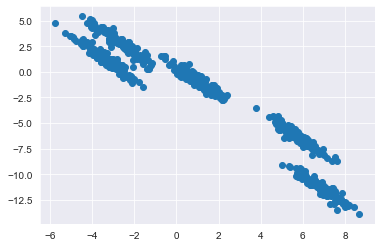

In [54]:
plt.scatter(X[:,0], X[:,1])
plt.show()

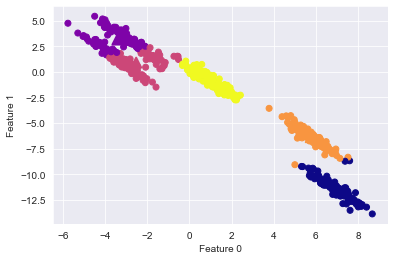

In [58]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=[0,1,2,3,4], marker='^', s=100, linewidths=2, cmap='plasma')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

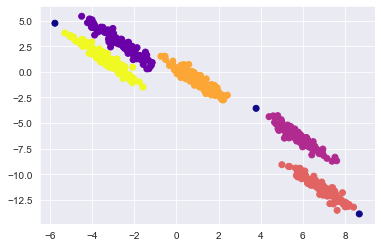

In [59]:
ss = StandardScaler()
X_scale = ss.fit_transform(X)
dbscan = DBSCAN(eps=0.123, min_samples=2)
clusters = dbscan.fit_predict(X_scale)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.show()